# Visual cluster analysis
This code has a function process_features that 
1.Reshapes the photos data into a matrix with one column per BGR color channel i.e. three columns, 
2.Undertakes a k means analysis of the data,
3.Allocates each pixel in a picture to one of k centroids, 
4.Allocates a picture to the color channel with the highest freq for the centroid that points are most often allocated to.

The results are then written to a dataframe and examples of each cluster are plotted to the screen


In [ ]:
import numpy as np
import cv2
from numpy import *
import os
import csv
from scipy import stats

#Defines the getim_list function that returns the filenames in a folder

def getim_list(path):
    return[os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]


#This processes a series of images and writes corresponding descriptor files to a set of csvs
global filelist2
filelist2=[]

#The process features function
def process_features(folder):

#Creates the features dataset
 features = []

 category=[]
 nbr_images=len(folder)

 f=getim_list(folder)
    


#selects all files above a certain size and adds them to filelist2
 for i in range(1,len(f)):
     statinfo= os.stat(f[i])
     #Filters out files with blank pictures and so smaller sizes
     if statinfo.st_size > 8923:
      filelist2.append(f[i])
    
 # Code below calculates the avergage color by averaging over the color channels   
 # average_color = [img[:, :, i].mean() for i in range(img.shape[-1])]

# features=zeros([len(filelist2),512])
 for j,f in enumerate(filelist2):
     # print(statinfo.st_size) 
      if j % 500==0:
        print(j)
      read_original=cv2.imread(filelist2[j])
      img=array(read_original)    
      arr = np.float32(img)
      #reshapes the photo data from X, Y, 3 to X*Y, 3 i.e 3 columns and X*Y rows. Opwn cv stores the colors in the BGR format
      pixels = arr.reshape((-1, 3))
      n_colors = 5
      # sets up the criteria to end the k means algorithm
      criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
      #This defines how the initial centres are initated
      flags = cv2.KMEANS_RANDOM_CENTERS
      _, labels, centroids = cv2.kmeans(pixels, n_colors, criteria, 10, flags)
      # Returns the n_colors number of centroids in the 3 dimensional coordinate space
      palette = np.uint8(centroids)
      # selects the dominant color i.e. the maximum frequency value of the table
      dominant_color = np.argmax(palette[np.argmax(stats.itemfreq(labels)[:, -1])])
      features.append(dominant_color)
 return features
    

# Processes the photographs 
import os
pathlist='filepath to the photos'

#Works through the files calculates the sift descriptors and writes them to a csv file
listed=process_features(pathlist)


In [12]:
#Sets up a pandas data frame to hold the data
import pandas as pd

df3 = pd.DataFrame(index=range(len(listed)), columns=['lon', 'lat', 'clust', 'filename'])

In [13]:
import string

#Creates storage

lonex=[]
lattex=[]

for elem in filelist2:
 # Extracts the longitude and latitudes from the file splitting it on //  and extracting the last element
  d=(string.replace(elem.split("\\")[-1], '.jpg','')).split(",")
  lattex.append(d[0])
  lonex.append(d[1])

In [14]:
#Sets the columns in the data frame into the
#The longitude and the latitude
df3['lon']=lonex
df3['lat']=lattex
#The cluster that the picture is assigned to
df3['clust']=listed
df3['filename']=filelist2

#Export the coordinates to a csv
df3.to_csv('filepathout', sep=',')


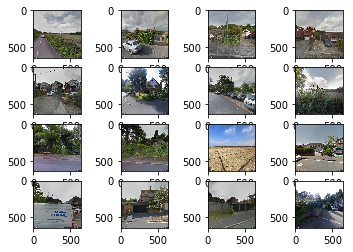

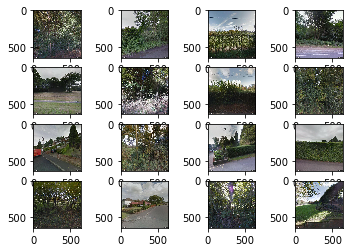

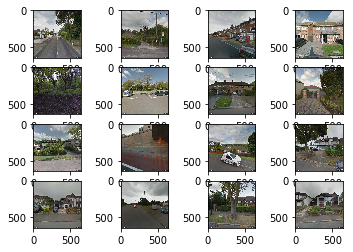

In [277]:
#Plots the images associated with each cluster
import matplotlib
from pylab import *
%matplotlib inline
from PIL  import Image
#Loops through the number of clusters
for j in range(0,3):
 #subsets the data according to cluster
 subs=df3[df3.clust == j]
 #returns the n photographs or the number in the cluster whichever is the smallest
 n=16
 for i in range(0,min(n,len(subs))):
  #shows the subplot 2 rows long and 4 columns wide
  subplot(4,4, i+1) 
  imshow(array(Image.open(subs['filename'].iloc[i])))
 show()

